In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS



In [18]:
# load the dataset
reviews = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Text Mining/Amazon_Reviews_Oneplus_Nord_CE2.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...
4229,1.0,Not satisfied,Itna mahnga ram ram ehte badiya aam khab pure ...,26 June 2022
4230,3.0,Nice mobile above average,"Camera quality is average, fingerprint reader ...",26 June 2022
4231,5.0,Awesome Phone,I was looking for a phone below 25k and there ...,26 June 2022
4232,4.0,Budget 1+,"Good budget 1+, bad battery life for some reas...",25 June 2022


In [19]:
reviews.Rating.describe()

count    4234.000000
mean        3.778224
std         1.486116
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [20]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Hang problem,2
1,I'm writing this review after using 3days !!!B...,65
2,Camera is so good n very fast phone back look ...,170
3,The media could not be loaded.\n ...,197
4,I got my delivery on 23 feb when I unboxed the...,110


In [21]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Hang problem,12.0
1,I'm writing this review after using 3days !!!B...,383.0
2,Camera is so good n very fast phone back look ...,882.0
3,The media could not be loaded.\n ...,963.0
4,I got my delivery on 23 feb when I unboxed the...,622.0


In [22]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Hang problem,5.500000
1,I'm writing this review after using 3days !!!B...,4.907692
2,Camera is so good n very fast phone back look ...,4.194118
3,The media could not be loaded.\n ...,4.181319
4,I got my delivery on 23 feb when I unboxed the...,4.663636


In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,15
2,Camera is so good n very fast phone back look ...,51
3,The media could not be loaded.\n ...,59
4,I got my delivery on 23 feb when I unboxed the...,48


In [24]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,0
3,The media could not be loaded.\n ...,0
4,I got my delivery on 23 feb when I unboxed the...,0


In [25]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,1
3,The media could not be loaded.\n ...,6
4,I got my delivery on 23 feb when I unboxed the...,1


In [27]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count'],axis=1,inplace=True)

In [28]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         Sang problem
1    I'm writing this review after using days !!!He...
2    Camera is so good n very fast phone back look ...
3    The media could not be loaded.\n              ...
4    I got my delivery on 23 feb when I unvexed the...
Name: Review, dtype: object

In [29]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       25
1       26
2       25
3       28
4       26
        ..
4229    26
4230    26
4231    26
4232    25
4233    26
Name: Review_Date, Length: 4234, dtype: object 
 0       February
1       February
2       February
3       February
4       February
          ...   
4229        June
4230        June
4231        June
4232        June
4233        June
Name: Review_Date, Length: 4234, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4229    2022
4230    2022
4231    2022
4232    2022
4233    2022
Name: Review_Date, Length: 4234, dtype: object


In [30]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,February,2022
1,26,February,2022
2,25,February,2022
3,28,February,2022
4,26,February,2022
...,...,...,...
4229,26,June,2022
4230,26,June,2022
4231,26,June,2022
4232,25,June,2022


In [31]:
df.Month.value_counts()

March       1320
April       1183
May          803
June         647
February     281
Name: Month, dtype: int64

In [32]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,2
1,2
2,2
3,2
4,2
...,...
4229,6
4230,6
4231,6
4232,6


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4234 non-null   float64
 1   Title        4234 non-null   object 
 2   Review       3998 non-null   object 
 3   Review_Date  4234 non-null   object 
 4   Date         4234 non-null   object 
 5   Month        4234 non-null   int64  
 6   Year         4234 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 231.7+ KB


In [34]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4234 non-null   float64
 1   Title        4234 non-null   object 
 2   Review       3998 non-null   object 
 3   Review_Date  4234 non-null   object 
 4   Date         4234 non-null   int64  
 5   Month        4234 non-null   int64  
 6   Year         4234 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 231.7+ KB


In [35]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,25,2,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26,2,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25,2,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28,2,2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26,2,2022


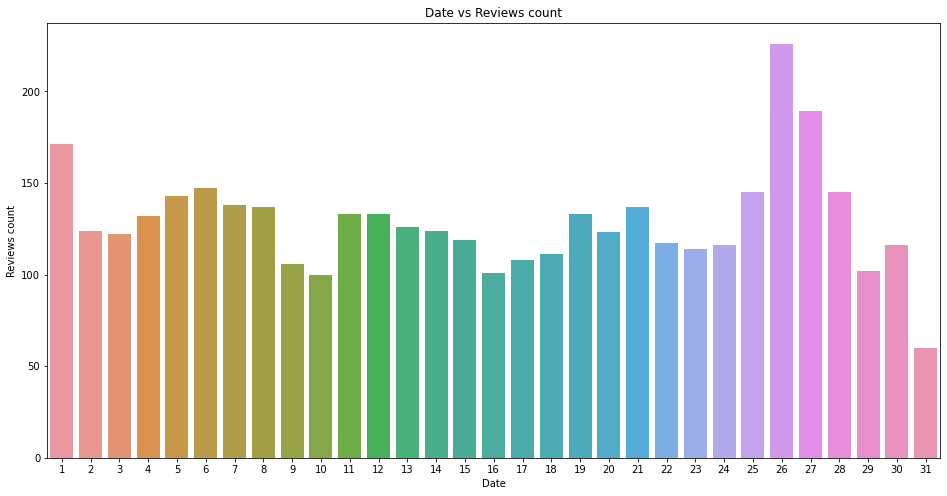

In [36]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

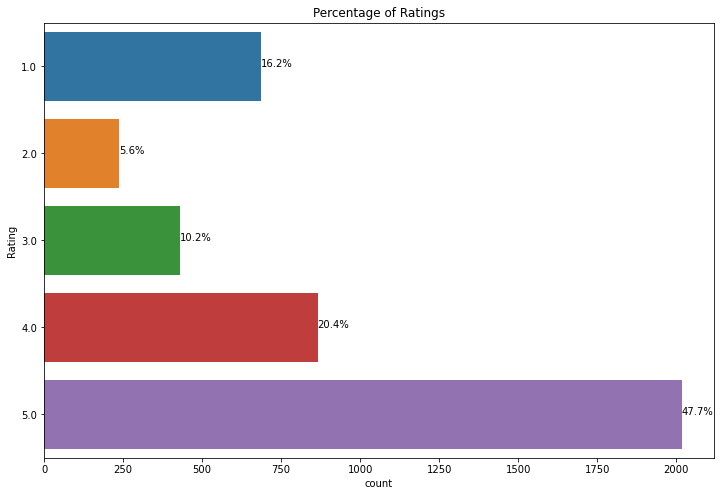

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

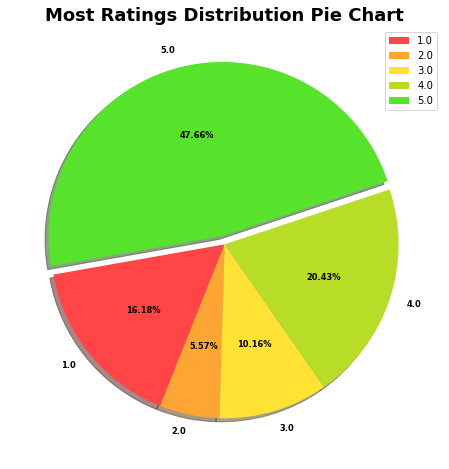

In [38]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

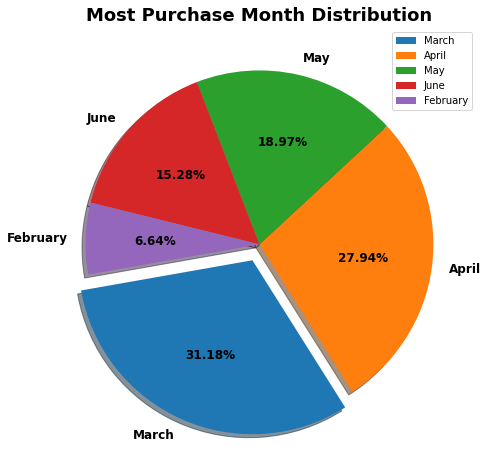

In [39]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [40]:
data = df[['Review']]
data

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,I got my delivery on 23 feb when I unboxed the...
...,...
4229,Itna mahnga ram ram ehte badiya aam khab pure ...
4230,"Camera quality is average, fingerprint reader ..."
4231,I was looking for a phone below 25k and there ...
4232,"Good budget 1+, bad battery life for some reas..."


In [41]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

<ipython-input-41-b776d550507f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


In [42]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

In [43]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...


In [44]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [45]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [46]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [47]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [48]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [49]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [50]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [51]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [52]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [53]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,hang problem,Hang problem,"[hang, problem]"
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,"[writing, review, using, day, honest, normal, ..."
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,"[camera, good, n, fast, phone, back, look, awe..."
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,"[medium, could, loaded, average, product, dece..."
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...,"[got, delivery, feb, unboxed, phone, display, ..."
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...,"[medium, could, loaded, phone, fab, sometime, ..."
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...,"[nord, ce, decent, choice, someone, looking, u..."
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...,"[phone, good, heating, problem, selfie, good, ..."
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...,"[buy, phone, amazon, really, bad, exp, dislike..."
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...,"[medium, could, loaded, grey, mirror, finish, ..."


In [54]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [55]:
import codecs
with codecs.open("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [56]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [57]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [58]:
TextBlob(dataframe['Clean_Reviews'][1]).words

tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                                      [hang, problem]
1    [writing, review, using, day, honest, normal, ...
2    [camera, good, n, fast, phone, back, look, awe...
3    [medium, could, loaded, average, product, dece...
4    [got, delivery, feb, unboxed, phone, display, ...
5    [medium, could, loaded, phone, fab, sometime, ...
6    [nord, ce, decent, choice, someone, looking, u...
7    [phone, good, heating, problem, selfie, good, ...
8    [buy, phone, amazon, really, bad, exp, dislike...
9    [medium, could, loaded, grey, mirror, finish, ...
Name: Clean_Reviews, dtype: object

In [59]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,hang problem
1,write review use day honest normal android pho...
2,camera good n fast phone back look awesomewith...
3,medium could load averag product decent day da...
4,got deliveri feb unbox phone display damag req...
...,...
4186,itna mahnga ram ram eht badiya aam khab pure s...
4187,camera qualiti averag fingerprint reader good ...
4188,look phone k option avail like nord ce realm p...
4189,good budget bad batteri life reason amol also ...


In [60]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MRIGESHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


,stemmed
0,hang problem
1,writing review using day honest normal android...
2,camera good n fast phone back look awesomewith...
3,medium could loaded average product decent day...
4,got delivery feb unboxed phone display damaged...
...,...
4186,itna mahnga ram ram ehte badiya aam khab pure ...
4187,camera quality average fingerprint reader good...
4188,looking phone k option available like nord ce ...
4189,good budget bad battery life reason amoled als...


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [62]:
print(cv.get_feature_names()[109:200])

['alternate', 'alternative', 'although', 'aluminium', 'always', 'amaaaazziingg', 'amajan', 'amaze', 'amazed', 'amazing', 'amazingeverything', 'amazingly', 'amazoing', 'amazon', 'amazonall', 'amazoncoming', 'amazone', 'amazonthey', 'ambient', 'ambition', 'amd', 'amej', 'amezing', 'amezon', 'ammount', 'amoled', 'amonth', 'amotions', 'amount', 'amountdon', 'amountone', 'amozn', 'ample', 'analysis', 'andar', 'ande', 'ander', 'andorid', 'android', 'androidneed', 'angel', 'angle', 'angry', 'animation', 'annonce', 'announce', 'announced', 'announcement', 'announces', 'annoyed', 'annoying', 'another', 'answer', 'answered', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'aod', 'aor', 'ap', 'apan', 'apart', 'aperture', 'apk', 'apki', 'app', 'apparently', 'appcamera', 'appear', 'appearance', 'appears', 'apperance', 'apple', 'applicable', 'application', 'applied', 'apply', 'applying', 'appo', 'appreciate', 'appropriate', 'approx', 'approximately', 'apps', 'appssince',

In [63]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [65]:
corpus[3]

'medium could load averag product decent day day activ one thing would like mention exchang far far alot good amazon like minut deliveri agent good although scratch neglect minor scratch exchang poco pro gb variant exchang rupe bought half year ago sold good price plu point amazoncom back devic would say ok devic camera averag perform fine one plu lose origin oxygen color warp charger vooc charger ye taken oppo wish way believ one plu chang one plu fan want merg brand pleas keep origin maintain thanx amazon hasselfre exchang alot better flipkart'

In [66]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [67]:
X.shape

(4191, 5000)

In [68]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aa,aa rha,aap,ab,abhi,abhi tak,abl,abl buy,absolut,absolut love,...,yellow,yet,youtub,youtub amazon,youtub review,yr,zen,zen mode,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4188,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:

from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [70]:
corpus[4]

'got deliveri feb unbox phone display damag request replac new phone technician suppos come inspect instead visit talk call ask instal applic even saw damag display screen let hope amazon right replac phone updat rest later amazon pl consid request replac item soon possibleedit phone perfect replac everyth perfect camera qualiti expect perfectoveral perform bestyou go'

In [71]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

X.shape

(4191, 5000)

In [72]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aa,aa rha,aap,ab,abhi,abhi tak,abl,abl buy,absolut,absolut love,...,yellow,yet,youtub,youtub amazon,youtub review,yr,zen,zen mode,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113718,0.134975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'hang problem writing review using day honest normal android phoneit like onepluscamera quality low say mp notsound also lowbattery backup ok one day normal use itsif ur gamer go itoverall price high handsetif u really wanna buy oneplus ho higher end modeli first time buying onepluslittle disappointment camera good n fast phone back look awesomewith dis price segment worth n important thing phone dedicated memory card slot think dis first one plus phone dedicated slot memory cardbattery backup also good n wit help w charger u charge ur phone frm minsit super vooc charger frm dat u charge ur phone fastvery smooth touch n fast phone u play game laginternet connectivity also fast n lightning wit jio sim u c hav pasted one photo showing downloading speed mbps wit cellular networki think everyone want buy dis phone go iti think oneplus launched dis phone lot good feature n important thing price lessi recommendjust go itthank u oneplus n amazon dis wonderful product medium could loaded avera

In [74]:

# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [75]:
for token in doc_block[:50]:
    print(token,token.pos_)  

hang VERB
problem NOUN
writing VERB
review NOUN
using VERB
day NOUN
honest ADJ
normal ADJ
android NOUN
phoneit PROPN
like SCONJ
onepluscamera PROPN
quality PROPN
low ADJ
say VERB
mp PROPN
notsound PROPN
also ADV
lowbattery ADJ
backup NOUN
ok INTJ
one NUM
day NOUN
normal ADJ
use NOUN
itsif PROPN
ur PROPN
gamer PROPN
go VERB
itoverall NOUN
price NOUN
high ADJ
handsetif PROPN
u PROPN
really ADV
wanna PROPN
buy VERB
oneplus NOUN
ho ADP
higher ADJ
end NOUN
modeli VERB
first ADJ
time NOUN
buying VERB
onepluslittle PROPN
disappointment PROPN
camera PROPN
good ADJ
n CCONJ


In [76]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['camera', 'performance', 'losing', 'originality', 'oxygen', 'color', 'charger', 'charger', 'taken', 'way', 'believed', 'change', 'fan', 'want', 'merge', 'brand', 'keep', 'originality', 'maintained', 'alot', 'flipkart', 'got', 'delivery', 'feb', 'phone', 'display', 'damaged', 'replacement', 'phone', 'suppose', 'come', 'inspection', 'visit', 'talked', 'call', 'asked', 'install', 'application', 'saw', 'damage', 'display', 'screen', 'let', 'hope', 'replace', 'phone', 'update', 'rest', 'consider', 'request', 'replace', 'item', 'possibleedit', 'phone', 'replaced', 'camera', 'quality', 'expected', 'perfectoverall', 'performance', 'go', 'could', 'loaded', 'phone', 'apps', 'gaana', 'crashing', 'think', 'need', 'fix', 'bug', 'oneplus', 'end', 'camera', 'quality', 'sound', 'effect', 'could', 'load', 'compared', 'phone', 'touch', 'finger', 'print', 'sensor', 'work', 'face', 'detection', 'thing', 'charging', 'charge', 'way', 'feature', 'android', 'oxygen', 'phone', 'buy', 'range', 'choice', 'looki

In [77]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,1773
1,camera,1067
2,battery,751
3,quality,588
4,product,363
5,charging,359
6,oneplus,358
7,price,317
8,day,271
9,could,253


In [79]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,3601
neg,590


In [80]:
dataframe.Clean_Reviews[8]

'buy phone amazon really bad exp dislike k poor build quality configuration real etc coming le k brand buy k audio worst single speaker volume low call end think phone mic issue back camera good phone touch also felt bit lack like fast charging within min charge front cam bit okay battery backup good g band support dual g standby oneplus promise something back camera quality audio improvement update buy offer otherwise go real gt master pro pro plus moto mobile also good using moto year good camera sound took two drawback phone rest okay manageble return policy replacement'

In [81]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.147, 'neu': 0.613, 'pos': 0.24, 'compound': 0.8148}

In [83]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))


,Review,scores
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou..."
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co..."
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp..."
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co..."
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co..."


In [85]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])

df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019,Negative
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818,Positive
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854,Positive
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729,Positive
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co...",0.7845,Positive
...,...,...,...,...
4186,itna mahnga ram ram ehte badiya aam khab pure ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4187,camera quality average fingerprint reader good...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.7906,Positive
4188,looking phone k option available like nord ce ...,"{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'comp...",0.9790,Positive
4189,good budget bad battery life reason amoled als...,"{'neg': 0.154, 'neu': 0.352, 'pos': 0.493, 'co...",0.8271,Positive


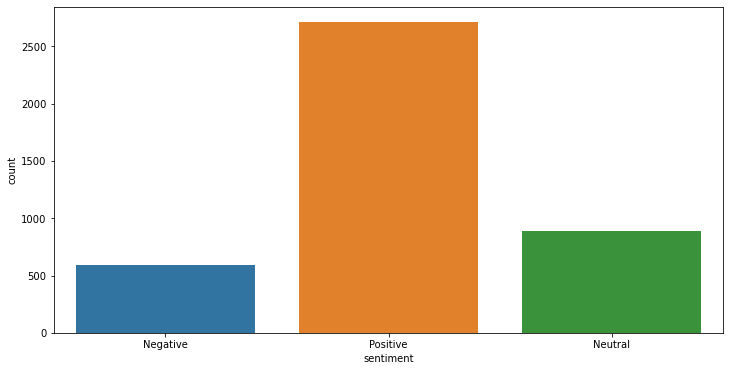

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)